In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from random import sample 

# Central Limit Theorem
 The Central Limit Theorem states that, regardless of the shape of the population distribution, the sampling distribution of the sample mean will tend to be approximately normally distributed when the sample size is sufficiently large. The CLT has significant implications in statistical inference. It allows us to make inferences about population parameters (such as the population mean) based on sample statistics (such as the sample mean). For example, it justifies the use of the normal distribution in hypothesis testing and confidence interval construction, even when the population distribution is not normal.
 
1. If population has normal distribution sample means will have normal distribution, or if sample size > 30, the sample mean will approximate a normal distribution even if the population is not a normal distribution.
2. The mean of the sample means will be equal or approximate the mean of the population.
3. The std of the sample means distribution (also known as the standard error SE) will be equal or approximate the population std divided by the square root of the sample size.

In [1]:
def Average(lst): 
    return sum(lst) / len(lst) 
Average([1,3])

2.0

The population mean is 49.01278, and the std is 8.891546135043106
The sample means when the sample size is 5: 48.925666666666665
The SE when the sample size is 5: 3.9397302643144947, and the population std divide the square root of the sample size is 3.9764203166063816
The sample means when the sample size is 20: 49.00318333333333
The SE when the sample size is 20: 1.954427205019983, and the population std divide the square root of the sample size is 1.9882101583031908
The sample means when the sample size is 50: 49.01876
The SE when the sample size is 50: 1.2554388591511203, and the population std divide the square root of the sample size is 1.2574545134644035
The sample means when the sample size is 100: 49.00221666666666
The SE when the sample size is 100: 0.8990586853605399, and the population std divide the square root of the sample size is 0.8891546135043106


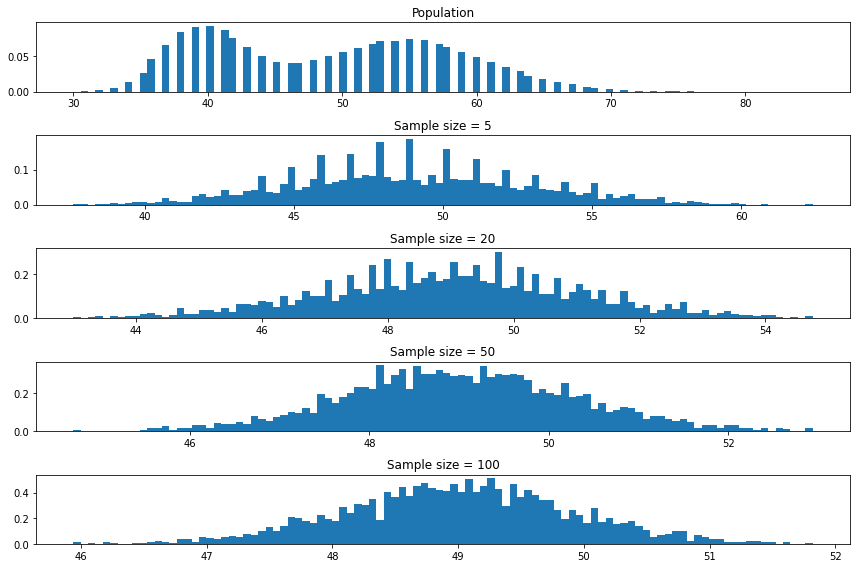

In [4]:
population1 = stats.poisson.rvs(loc=20, mu=35, size=150000)
population2 = stats.poisson.rvs(loc=30, mu=10, size=100000)
population = np.concatenate((population1,population2))

print(f'The population mean is {population.mean()}, and the std is {population.std()}')
sample_sizes = [5,20,50,100]

fig,ax = plt.subplots(nrows = len(sample_sizes) + 1, ncols = 1, figsize = (12,8))
ax[0].hist(population, density=True, bins=100)
ax[0].set_title('Population')

for index, sample_size in enumerate(sample_sizes):
    mean_lst = [] 
    se_lst = []
    for i in range(0,3000):
        sample = np.random.choice(population,size = sample_size)
        se_lst.append(stats.sem(sample))
        mean_lst.append(sample.mean())
    mean_array = np.array(mean_lst)
    ax[index + 1].hist(mean_array, density=True, bins=100)
    ax[index + 1].set_title(f'Sample size = {sample_size}')
    print(f'The sample means when the sample size is {sample_size}: {mean_array.mean()}')
    print(f'The SE when the sample size is {sample_size}: {mean_array.std()}, and the population std divide the square root of the sample size is {population.std() / np.sqrt(sample_size)}')
    print(f'==================================')
plt.tight_layout()


# Standard normal distribution (Z distribution)
The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1.

The standard normal distribution  has a y axis of probability, and the chances of a data point landing one std inside the mean is 68.1%, between 1 and 2 std is 27.2% and beyond 2 std is 4.2%.

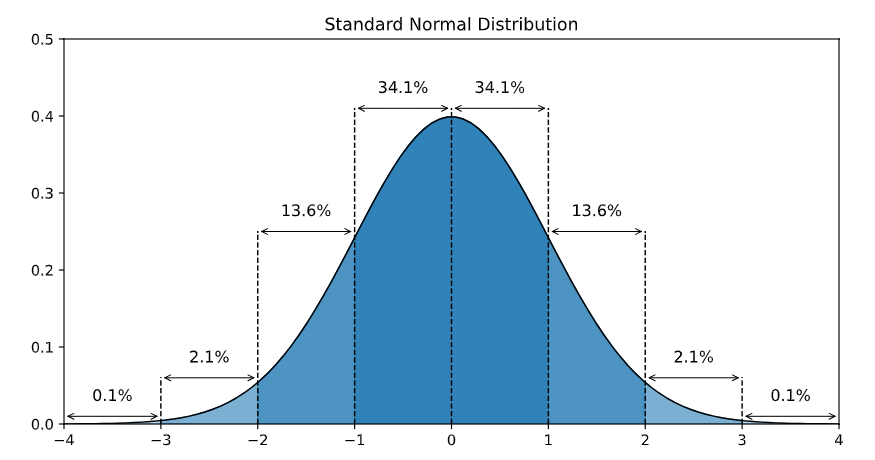


# T distribution
The t-distribution is a symmetric and bell-shaped but has heavier tails compared to the standard normal distribution. This means that it has more probability in the tails and is more spread out. 

The t-distribution depends on the degrees of freedom. The degrees of freedom determine the shape of the t-distribution. As the degrees of freedom increase, the t-distribution approaches the standard normal distribution. The typical number for a t-distribution to become the z-distribution is 30.

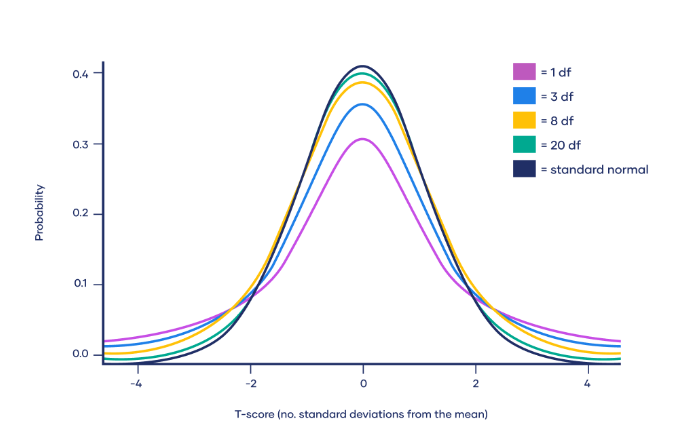

# Z score

Any normal distribution can be standardized by converting its values into z scores. A Z-score (also known as a standard score) is a measure of how many standard deviations a data point is from the mean of a distribution. It's a standardized score that allows you to compare values from different distributions. Z scores tell you how many standard deviations from the mean each value lies.

Below we have a normal distribution with mean of 50 with std of 10, we will try to convert it. 

Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values.

Z-score = (value - mean) / std
EX: if we have a population with mean = 50 and std = 4, the value 62 will have a z score of
(62 - 50) / 4 = 3

The intuitive explanation of  Z-score using the formula, is to evaluate how many standard deviation away is the mean to the given value.

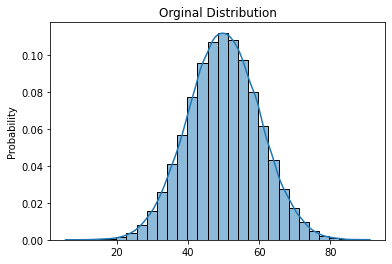

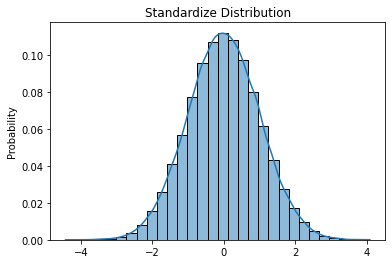

In [201]:
data = np.random.normal(50, 10, 100000)

sns.histplot(data, bins=30, kde=True, stat='probability')

plt.title("Orginal Distribution")

plt.show()

standardize_data = (data - data.mean())/data.std()
sns.histplot(standardize_data, bins=30, kde=True, stat='probability')
plt.title("Standardize Distribution")

plt.show()

# Putting it all together
Using the central limit theorem, if sample size > 30, the sample mean will approximate a normal distribution even if the population is not a normal distribution. We can than convert the normal distribution to a standard normal distrbution by calculating the Z-score. In addition, since we know Z scores can be transformed into probability of an event happening by integral of the area under the curve of the standard normal distribution from the left side. We can then calculate the probabilty of that observation happening.

EX: An average pitch speed of a baseball in the MLB is 88mph, with a standard deviation of 3. If a random sample of 50 pitches are selected, what is the probability that the mean of this sample is higher than 84.5mph  or lower than 94.5mph? 

Population mean:87.9762375781487, Population std:2.9727088593364788
Sample mean:87.98879924688396, Sample std:2.877221985353088


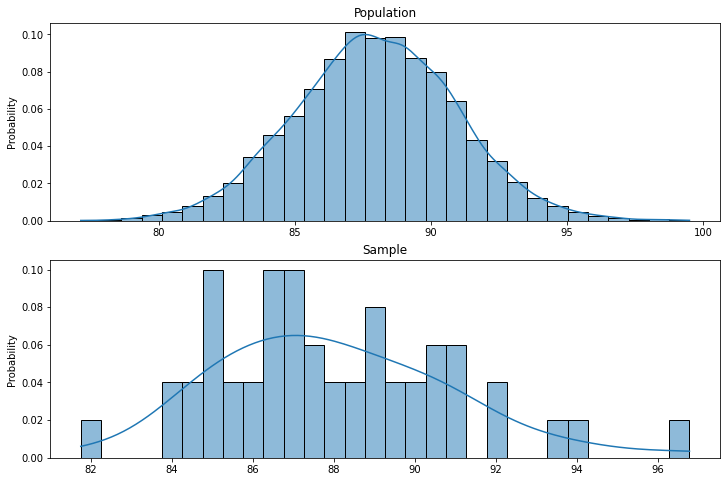

In [319]:
population_speed = np.random.normal(88, 3, 10000)
sample_speed = np.random.choice(population_speed,size = 50)
fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))

sns.histplot(population_speed, bins=30, kde=True, stat='probability',ax = ax[0], label = 'Population')
sns.histplot(sample_speed, bins=30, kde=True, stat='probability',ax = ax[1],label = 'Sample')

print(f'Population mean:{population_speed.mean()}, Population std:{population_speed.std()}')
print(f'Sample mean:{sample_speed.mean()}, Sample std:{sample_speed.std()}')

ax[0].set_title('Population')
ax[1].set_title('Sample')

plt.show()

To solve the above question, we first plot the population and sample above and calculate the mean and std of each statistic. We then calculate the z score of 84.5mph and 94.5mph.

In [320]:
lower_z_score = (84.5 - 88) / 3
upper_z_score = (94.5 - 88) / 3

lower_prob = stats.norm.cdf(lower_z_score)
upper_prob = stats.norm.cdf(upper_z_score)

ans = lower_prob + (1 - upper_prob)
print(f'The probabilty is {ans * 100:.2f} %')

The probabilty is 13.68 %


Probability of pitch speed faster than 94.5 or lower than 84.5 mph: 13.81 %


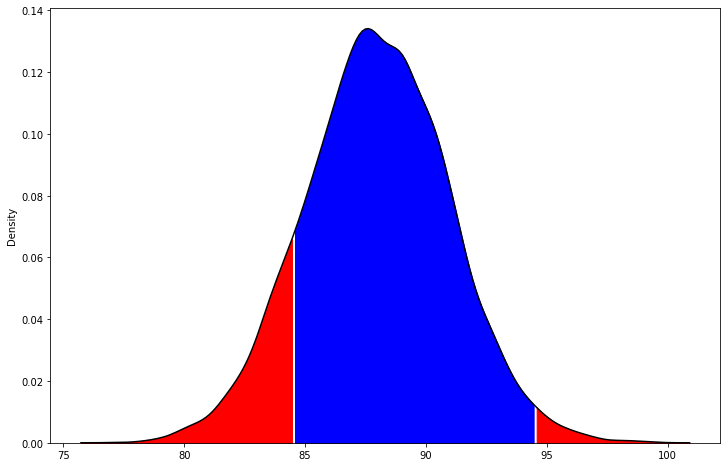

In [322]:
from scipy.integrate import trapz
fig,ax = plt.subplots(figsize = (12,8))

points = sns.kdeplot(population_speed,color='black').get_lines()[0].get_data()
x = points[0]
y = points[1]

lower_mask = x < 84.5
lower_filled_x, lower_filled_y = x[lower_mask], y[lower_mask]
lower_area = np.trapz(lower_filled_y, lower_filled_x)

upper_mask = x > 94.5
upper_filled_x, upper_filled_y = x[upper_mask], y[upper_mask]
upper_area = np.trapz(upper_filled_y, upper_filled_x)

area = lower_area + upper_area
plt.fill_between(x,y,where = x < 84.5, color='r')
plt.fill_between(x,y,where = (x > 84.5) & (x < 94.5),color='b')
plt.fill_between(x,y,where = x > 94.5,color='r')

print(f'Probability of pitch speed faster than 94.5 or lower than 84.5 mph: {area.round(4) * 100} %')

# Hypothesis testing
A statistical hypothesis test is a method of statistical inference used to decide whether the data sufficiently support a particular hypothesis.
Statistical hypothesis tests are based on statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing, and a alternate hypothesis that states that there is a statistical significance 

### Z-statistic
The Z-statistic, also known as the standard score, is a statistic used in hypothesis testing when the population parameters (mean and standard deviation) are known. It's particularly useful for comparing a sample statistic (such as a sample mean) to a population parameter. 

Z statistic = ($\bar x$  - $\mu$)/($\sigma$/$\sqrt{n}$)

 
 $\bar x$ is the sample mean,

μ is the population mean (under the null hypothesis),

σ is the population standard deviation,

n is the sample size.

### T-statistic
The t-statistic is a statistic used in hypothesis testing to compare sample means when the population standard deviation is unknown and the sample size is small (sample size < 30).

T statistic = ($\bar x$  - $\mu$)/(s/$\sqrt{n}$)

 
 $\bar x$ is the sample mean,

μ is the population mean (under the null hypothesis),

s is the population standard deviation,

n is the sample size.

### P Value
In hypothesis testing, the p-value is a measure that helps us determine the strength of evidence against the null hypothesis. It quantifies the probability of observing the test statistic, or a more extreme one, under the assumption that the null hypothesis is true.

A test statistic is a numerical summary of the data that is used to decide whether to reject the null hypothesis. The choice of test statistic depends on the hypothesis being tested and the type of data collected. Common test statistics include the Z-statistic, T-statistic etc.

 # Z test
 A Z-test is a statistical test used to determine whether two population means are different when the population standard deviations are known and the sample sizes are large. It's also used to compare a sample mean to a known population mean.
 
There are several types of Z-tests, each serving a specific purpose in hypothesis testing. Here are some common types of Z-tests:
1. One sample: Used to determine whether the mean of a single sample is significantly different from a known population mean.
2. Two sample for independent samples: Used to compare the means of two independent samples to determine if they come from populations with the same mean.
3. Two sample for paired samples: Used to compare the means of two paired or matched samples to determine if there is a significant difference between them.
4. Proportion: Used to test whether the proportion of successes in a sample differs significantly from a hypothesized population proportion.
5. Z-test for difference between proportions: Used to compare the proportions of successes in two independent samples to determine if they come from populations with the same proportion of successes.
 
### One sample Z test (two tail)
EX: Suppose a company that produces light bulbs claims that the mean lifespan of their light bulbs is 1000 hours,and a population standard deviation of 50 hours. You decide to conduct a hypothesis test to see if the mean lifespan of the light bulbs differs from this claim.

1. Form the Hypotheses
- H0 (null hypothesis): The population mean equals the claim(1000 hours lifespan) 
- H1 (Alternative hypothesis): The population mean does not equal the claim.

2. Choose a Significance Level
- We set 0.05

3. Calculate the Z statistic and the p value

4. Compare and  clonclude
- Compare the p value or Z statistic and decide whether to accept or reject the null hypothesis.


Population mean:1000.6087171328325, Population std:50.316943021304766
Sample mean:995.3840591352699, Sample std:52.20204187019044


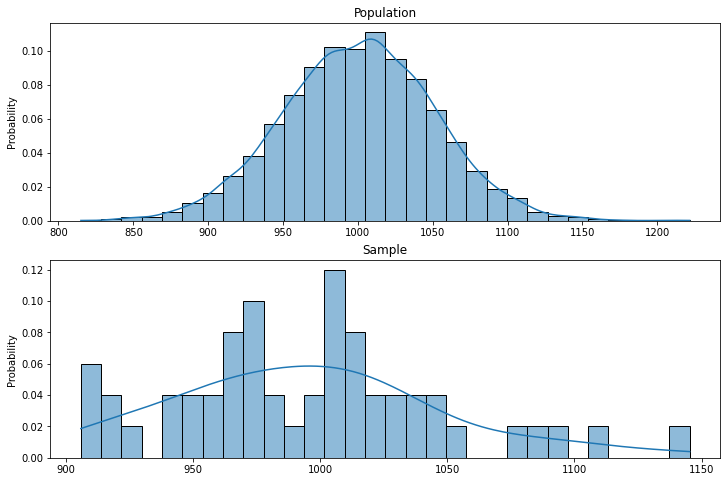

In [19]:
# The population is set with mean = 1000 hours and std = 50, since the underlying mean is 1000
# We should get a conclusion that fail to reject H0
population_lifespan = np.random.normal(1000, 50, 10000)
sample_lifespan= np.random.choice(population_lifespan,size = 50)

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))

sns.histplot(population_lifespan, bins=30, kde=True, stat='probability',ax = ax[0], label = 'Population')
sns.histplot(sample_lifespan, bins=30, kde=True, stat='probability',ax = ax[1],label = 'Sample')

print(f'Population mean:{population_lifespan.mean()}, Population std:{population_lifespan.std()}')
print(f'Sample mean:{sample_lifespan.mean()}, Sample std:{sample_lifespan.std()}')

ax[0].set_title('Population')
ax[1].set_title('Sample')

plt.show()

In [138]:
# We set the threshold to 0.05 which is fairly common
# Calculate the Z statistic and Pvalue
# Sample mean
sample_mean = sample_lifespan.mean()

# Population mean
population_mean = 1000

# Population standard deviation
population_std = 50

# Sample size
sample_size = 50
z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic))) # For a two-tailed test, double the p-value

print(f'z_statistic: {z_statistic}, p_value: {p_value}')
# Because P value is greater than the threshold of 0.05, we fail to reject H0, which should be true givien that we know the population mean is set to 1000.

z_statistic: 0.6797202631073678, p_value: 0.49668160318486


Population mean:979.9884868761872, Population std:49.79676315152406
Sample mean:971.4936226222355, Sample std:43.204802709277075


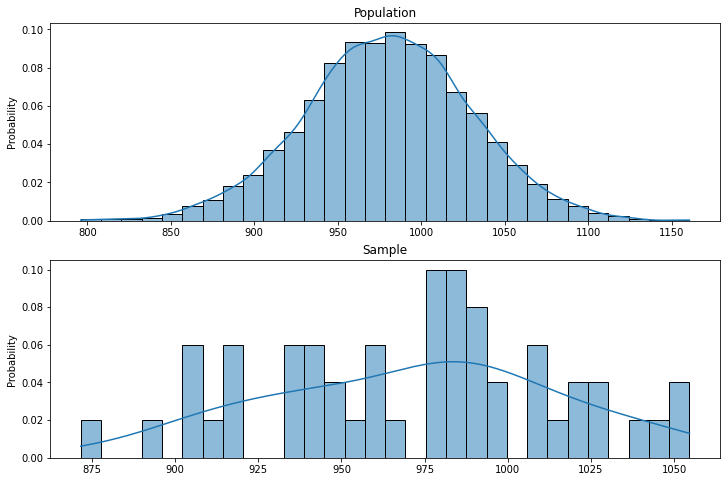

In [140]:
# The population is set with mean = 980 hours and std = 50, since the underlying mean is 980
# We should get a conclusion to reject H0
population_lifespan = np.random.normal(980, 50, 10000)
sample_lifespan= np.random.choice(population_lifespan,size = 50)

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))

sns.histplot(population_lifespan, bins=30, kde=True, stat='probability',ax = ax[0], label = 'Population')
sns.histplot(sample_lifespan, bins=30, kde=True, stat='probability',ax = ax[1],label = 'Sample')

print(f'Population mean:{population_lifespan.mean()}, Population std:{population_lifespan.std()}')
print(f'Sample mean:{sample_lifespan.mean()}, Sample std:{sample_lifespan.std()}')

ax[0].set_title('Population')
ax[1].set_title('Sample')

plt.show()

In [141]:
# We set the threshold to 0.05 which is fairly common
# Calculate the Z statistic and Pvalue
# Sample mean
sample_mean = sample_lifespan.mean()

# Population mean
population_mean = 1000

# Population standard deviation
population_std = 50

# Sample size
sample_size = 50
z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))# For a two-tailed test, double the p-value

print(f'z_statistic: {z_statistic}, p_value: {p_value}')
# Because P value is greater than the threshold of 0.05, we reject H0, which should be true given that we know the population mean is set to 980.

z_statistic: -4.03141055017601, p_value: 5.5443097682461584e-05


### One sample Z test (one tail)
In the above example, we are only able to decide whether the claim is correct but not able to decide whether the true mean is above or below the claim lifespan of 1000 hours. To determine if the life span is below we will use One sample Z test (one tail). The steps is the same, the only difference is the hypotheses and the calculation of p value. The one tail Z test is a directional test that determines the relationship between population means in a single direction.

- H0(Null hypothesis): The population mean is the same as claimed.
- H1(Alternative hypothesis): The population mean is actaully shorter than the claim of 1000 hours.

If you mistakenly conduct a left-tailed test when it should be right-tailed, you may not detect the intended effect, and your conclusions may be inaccurate. Always carefully consider the research question and formulate the hypotheses correctly before conducting hypothesis tests. The one-tailed test provides more power to detect an effect, you may be tempted to use a one-tailed test whenever you have a hypothesis about the direction of an effect. Before doing so, consider the consequences of missing an effect in the other direction.  Imagine you have developed a new drug that you believe is an improvement over an existing drug.  You wish to maximize your ability to detect the improvement, so you opt for a one-tailed test. In doing so, you fail to test for the possibility that the new drug is less effective than the existing drug.  The consequences in this example are extreme, but they illustrate a danger of inappropriate use of a one-tailed test. 

Though it is not likely, it is possible for the null hypothesis to be rejected when using a right-tailed Z-test when you should have been using a left-tailed Z-test. This scenario occurs when the observed sample statistic falls in the critical region of the right-tailed test, leading to a rejection of the null hypothesis.

Population mean:989.5506366452404, Population std:50.163775349145574
Sample mean:986.4232100529147, Sample std:39.51127202591199


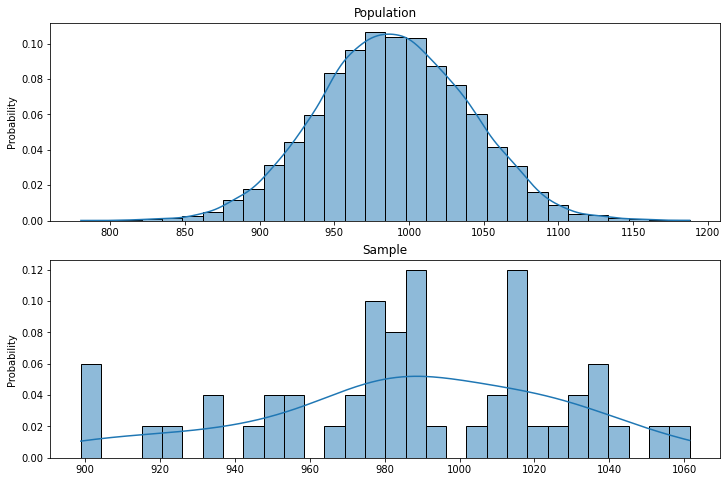

In [146]:
# The population is set with mean = 990 hours and std = 50, since the underlying mean is 980
# We should get a conclusion to reject H0, and accept H1.
population_lifespan = np.random.normal(990, 50, 10000)
sample_lifespan= np.random.choice(population_lifespan,size = 50)

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))

sns.histplot(population_lifespan, bins=30, kde=True, stat='probability',ax = ax[0], label = 'Population')
sns.histplot(sample_lifespan, bins=30, kde=True, stat='probability',ax = ax[1],label = 'Sample')

print(f'Population mean:{population_lifespan.mean()}, Population std:{population_lifespan.std()}')
print(f'Sample mean:{sample_lifespan.mean()}, Sample std:{sample_lifespan.std()}')

ax[0].set_title('Population')
ax[1].set_title('Sample')

plt.show()

In [147]:
# We set the threshold to 0.05 which is fairly common
# Calculate the Z statistic and Pvalue
# Sample mean
sample_mean = sample_lifespan.mean()

# Population mean
population_mean = 1000

# Population standard deviation
population_std = 50

# Sample size
sample_size = 50
z_statistic = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

p_value = stats.norm.cdf(z_statistic)  # For a one-tailed test, we do not double the p-value

print(f'z_statistic: {z_statistic}, p_value: {p_value}')
# Because P value is greater than the threshold of 0.05, we reject H0, which should be true given that we know the population mean is set to 980.

z_statistic: -1.9200480476658772, p_value: 0.027425915318441664


### two sample z test
Two sample z test is used to compare the means of two independent samples to determine if they come from populations with the same mean. Like the one sample test there is also a one tail and two tail variation.

The z statistic has a different equation:

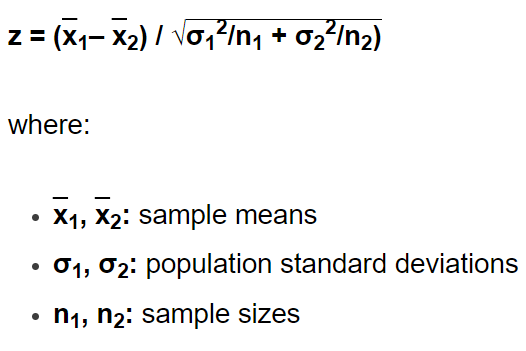

EX: We would like to compare the test scores of two schools on the same test, and see if the average score are the same.
- H0: The mean scores are the same.
- H1: The mean scores are not equal.
The threshold is set to 0.05.

After calculating the p value to be smaller than the threshold, we conclude that we reject the null hypothesis, and that the mean score are not the same. (Which is correct based on the fact that we set the population mean to 88 and 90)

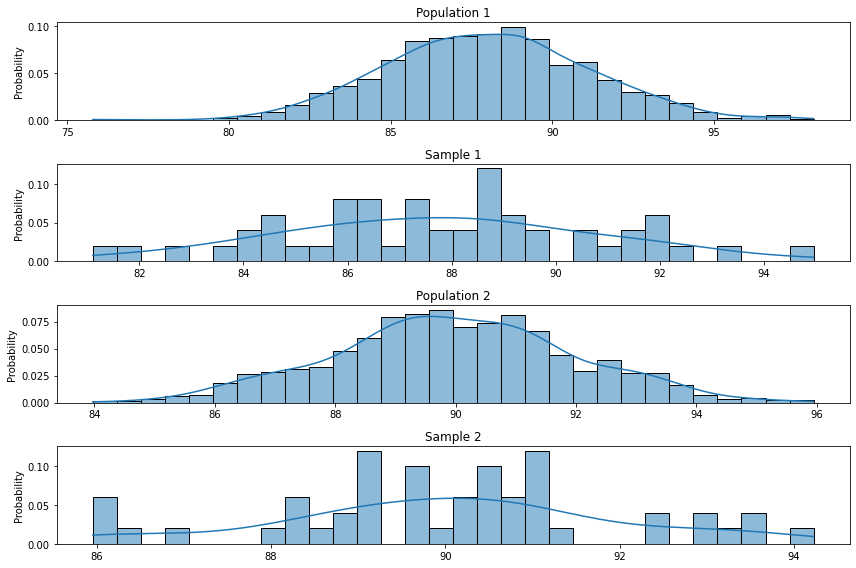

In [173]:
test_score_1 = np.random.normal(88, 3, 1000)
sample_score_1 = np.random.choice(test_score_1,size = 50)
test_score_2 = np.random.normal(90, 2, 1000)
sample_score_2 = np.random.choice(test_score_2,size = 50)

fig,ax = plt.subplots(nrows = 4, ncols = 1,figsize = (12,8))

sns.histplot(test_score_1, bins=30, kde=True, stat='probability',ax = ax[0], label = 'Population 1')
sns.histplot(sample_score_1, bins=30, kde=True, stat='probability',ax = ax[1],label = 'Sample 1')

sns.histplot(test_score_2, bins=30, kde=True, stat='probability',ax = ax[2], label = 'Population 2')
sns.histplot(sample_score_2, bins=30, kde=True, stat='probability',ax = ax[3],label = 'Sample 2')

ax[0].set_title('Population 1')
ax[1].set_title('Sample 1')
ax[2].set_title('Population 2')
ax[3].set_title('Sample 2')

plt.tight_layout()

In [174]:
# Population standard deviations (known)
sigma1 = 3  # Standard deviation of population 1
sigma2 = 2  # Standard deviation of population 2

# Sample means
mean1 = np.mean(sample_score_1)
mean2 = np.mean(sample_score_2)

# Sample sizes
n1 = len(sample_score_1)
n2 = len(sample_score_2)

# Calculate the Z-statistic
z_statistic = (mean1 - mean2) / ((sigma1**2 / n1 + sigma2**2 / n2)**0.5)

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: -4.487967625456352
P-value: 7.1905852476739085e-06


### Two sample Z test for paired samples: 
The Two sample for paired samples is used to compare the means of two paired or matched samples to determine if there is a significant difference between the mean. The paired z-test assumes that the paired differences are a simple random sample from a population of normally distributed difference values that all have the same mean and variance. This assumption implies that the data are continuous, and their distribution is symmetric.

The z satistic equation: Z = 

EX: We would like to compare the test scores of one school on the same level of test, and see if the average score are the same or has the score improved. (Since we are testing to see if the score IMPROVED or not, this is a one tail test)
- H0: The mean scores are the same or the first score is lower.
- H1: The mean scores after is higher.

The threshold is set to 0.05.

After calculating the p value to be smaller than the threshold, we conclude that we reject the null hypothesis, the mean scores after is higher . (Which is correct based on the fact that we set the population mean before = 88.5 and after = 90)

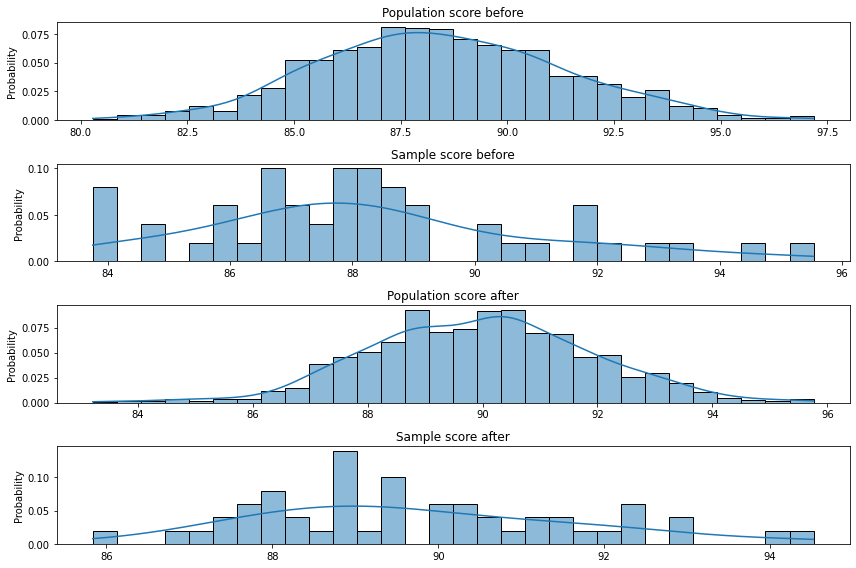

In [197]:
test_score_before = np.random.normal(88.5, 3, 1000)
sample_score_before = np.random.choice(test_score_before,size = 50)
test_score_after = np.random.normal(90, 2, 1000)
sample_score_after = np.random.choice(test_score_after,size = 50)

fig,ax = plt.subplots(nrows = 4, ncols = 1,figsize = (12,8))

sns.histplot(test_score_before, bins=30, kde=True, stat='probability',ax = ax[0], label = 'Population 1')
sns.histplot(sample_score_before, bins=30, kde=True, stat='probability',ax = ax[1],label = 'Sample 1')

sns.histplot(test_score_after, bins=30, kde=True, stat='probability',ax = ax[2], label = 'Population 2')
sns.histplot(sample_score_after, bins=30, kde=True, stat='probability',ax = ax[3],label = 'Sample 2')

ax[0].set_title('Population score before')
ax[1].set_title('Sample score before')
ax[2].set_title('Population score after')
ax[3].set_title('Sample score after')

plt.tight_layout()

In [198]:
# Calculate the differences between after and before scores
differences = sample_score_after - sample_score_before

# Calculate the mean difference
mean_difference = np.mean(differences)

# Calculate the standard deviation of the differences
std_difference = np.std(differences, ddof=1)  # Use Bessel's correction with ddof=1 for sample standard deviation

# Number of paired observations
n = len(sample_score_before)

# Hypothesized mean difference (under the null hypothesis)
mu_0 = 0  # Assuming no difference

# Calculate the standard error of the mean difference
se_mean_difference = std_difference / np.sqrt(n)

# Calculate the Z-statistic
z_statistic = (mean_difference - mu_0) / se_mean_difference

# Calculate the p-value for a two-tailed test
p_value = 1 - stats.norm.cdf(abs(z_statistic))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: 2.9685554887848333
P-value: 0.0014960153768011075


### Proportion Z Test 
The proportion Z test is used to test whether the proportion of successes in a sample differs significantly from a hypothesized population proportion. ("Successes" typically refer to the number of occurrences of the event or outcome of interest in the sample)

EX: Suppose we want to test whether the proportion of students who pass a standardized exam is significantly different from 0.75 (75%).
- H0: The proportion is 75%
- H1: The proportion is not 75%

Threshold set to 0.05

After calculating the p value to be smaller than the threshold, we conclude that we reject the null hypothesis, the proportion is not 75% . (Which is correct based on the fact that we set the population proportion to 60%)

In [260]:
# Parameters
from statsmodels.stats.proportion import proportions_ztest
population_num = 1000
p = 0.60  
null_p = 0.75  
sample_num = 50
# Generate binomial dataset
binomial_data_population = np.random.binomial(n=1, p=p, size=population_num)
binomial_data_sample = np.random.choice(binomial_data_population,size = sample_num)

z_statistic, p_value = proportions_ztest(np.unique(binomial_data_sample, return_counts=True)[1][1], sample_num, value = null_p)
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: -3.2552964731657124
P-value: 0.0011327405203389361


### Two sample Z-test for difference between proportions
The two sample Z-test for difference between proportions is used to compare the proportions of successes in two independent samples to determine if they come from populations with the same proportion of successes.

EX: Suppose we want to test whether the proportion of students who pass a standardized exam is the same between two schools.
- H0: The proportion is the same
- H1: The proportion are not the same

Threshold set to 0.05

After calculating the p value to be smaller than the threshold, we conclude that we reject the null hypothesis, The proportion are not the same. (Which is correct based on the fact that we set the population proportion to 55% and 70%)

In [290]:
population_num = 1000
proportion_1 = 0.65  
proportion_2 = 0.70  
 
sample_num = 50
# Generate binomial dataset
binomial_data_population_1 = np.random.binomial(n=1, p=proportion_1, size=population_num)
binomial_data_sample_1 = np.random.choice(binomial_data_population_1,size = sample_num)

binomial_data_population_2 = np.random.binomial(n=1, p=proportion_2, size=population_num)
binomial_data_sample_2 = np.random.choice(binomial_data_population_2,size = sample_num)



# Perform two-sample proportions Z-test
z_statistic, p_value = proportions_ztest(count=np.array([np.unique(binomial_data_sample_1, return_counts=True)[1][1],np.unique(binomial_data_sample_2, return_counts=True)[1][1]]),
                                          nobs=np.array([sample_num,sample_num]))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: -2.182178902359924
P-value: 0.029096331741252188


# T test
### Single sample T test
Use a one sample t test to evaluate a population mean using a single sample. Usually, you conduct this hypothesis test to determine whether a population mean differs from a hypothesized value you specify.
EX: A phone company claims that the new battery technology would last 24 hours if fully charged.
A single t test would be able to test this claim. 

In the below code, we create a population that has a noraml distribution with a mean of 24 and std of 1, note that this is the ground truth and in a realistic situation, the mean and std of the population are unkown.
The code then random samples from the population to retrieve a sample set that we will apply single sample T test on.
- H0 (null hypothesis): The population mean equals the hypothesized value(24 hours battery life) 
- H1 (Alternative hypothesis): The population mean does not equal the hypothesized value.

The threshold to test for statistcal sitgnificants would be set to 0.05 or 5%, this is a common threshold. 

The sample mean is 24.00 hours, and the sample std is 1.00


Text(0.5, 1.0, 'Sample')

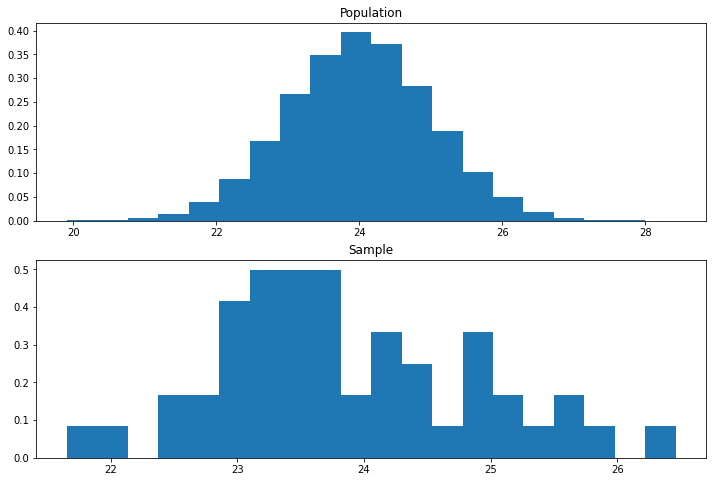

In [9]:
population= stats.norm.rvs(loc=24, scale=1, size=150000)
sample = np.random.choice(population,size = 50)

# print(f'The population mean is {population.mean():.2f}, and the population std is {population.std():.2f}')
print(f'The sample mean is {population.mean():.2f} hours, and the sample std is {population.std():.2f}')

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))
ax[0].hist(population, density=True, bins=20)
ax[0].set_title('Population')
ax[1].hist(sample, density=True, bins=20)
ax[1].set_title('Sample')

In [10]:
t_stat, p_value = stats.ttest_1samp(sample, popmean=24)
print(f'The p value for this T test is {p_value:.4f}')

The p value for this T test is 0.3538


Since the p value is larger than 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the claim of the company is correct.
In this example, since we know the population mean is indeed 24 hours, the test is prove to give us the correct inference.

However, if we create a population with a mean of 23 hours and a std of 1. The t test gives us a p value less than the threshold 0.05, in that case, we will reject the null hypothesis and conclude that the battery life is not 24 hours. Note: we can only conlcude that the battery life is not 24 hours, but we can not imply that it is larger or lower than 24 hours.

The p value for this T test is 9.166280643946068e-11


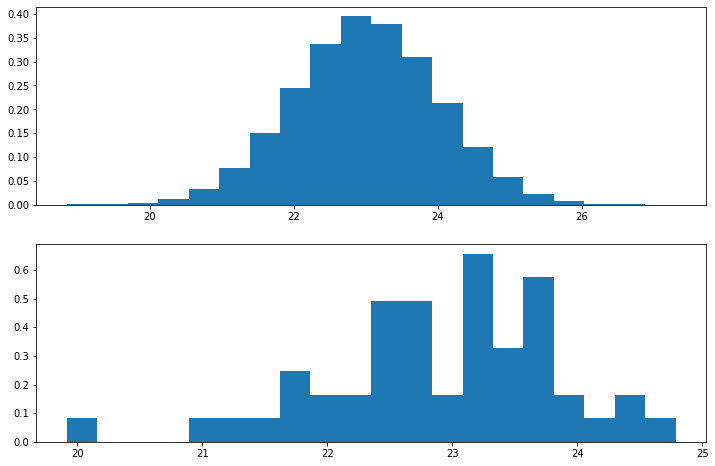

In [12]:
population2 = stats.norm.rvs(loc=23, scale=1, size=150000)
sample2 = np.random.choice(population2,size = 50)
fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))
ax[0].hist(population2, density=True, bins=20)
ax[1].hist(sample2, density=True, bins=20)

t_stat, p_value = stats.ttest_1samp(sample2, popmean=24)
print(f'The p value for this T test is {p_value}')

### Two sample T test (two tail)
A two sample t test is used to test whether the unkown population means of two groups are equak or not.
In the following example we will compare two delivery companies and use the two sample t test to test the delivery time. Company A has an average delivery time of 48 hours and std of 2. Company B has an average delivery time of 45 hours and std of 2. This underlying ground truth is unknown in real life. The two samples are random samples with a size of 50.

Text(0.5, 1.0, 'B company delivery sample')

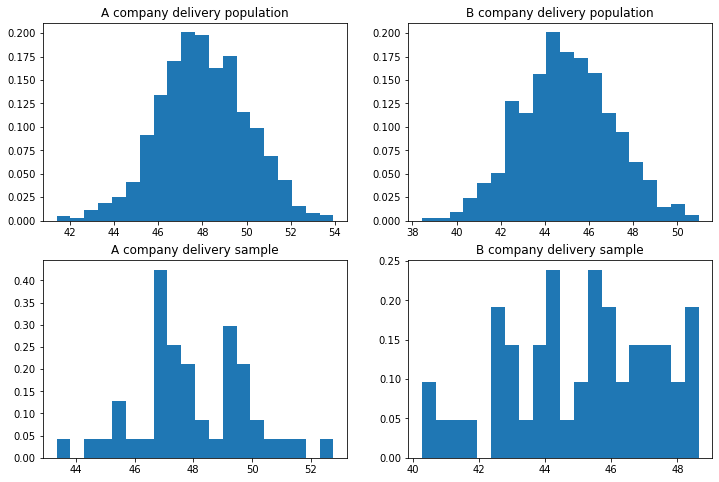

In [7]:
# define the population ground truth 
A_delivery = stats.norm.rvs(loc=48, scale=2, size=1000)
B_delivery = stats.norm.rvs(loc=45, scale=2, size=1000)
# random sample
A_sample = np.random.choice(A_delivery,size = 50)
B_sample = np.random.choice(B_delivery,size = 50)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

ax[0,0].hist(A_delivery, density=True, bins=20)
ax[0,0].set_title('A company delivery population')
ax[0,1].hist(B_delivery, density=True, bins=20)
ax[0,1].set_title('B company delivery population')
ax[1,0].hist(A_sample, density=True, bins=20)
ax[1,0].set_title('A company delivery sample')
ax[1,1].hist(B_sample, density=True, bins=20)
ax[1,1].set_title('B company delivery sample')

- H0 (null hypothesis): The delivery time of company A and B are the same.
- H1(Alternative hypothesis): The delivery time of comapy A and B are different.

The threshold will be set to 0.05. If the p value is smaller than the threshold we can reject the null hypothesis.

In [8]:
t_statistic, p_value = stats.ttest_ind(A_sample, B_sample)
print(f'The p value for this two sample T test is {p_value:.4f}')

The p value for this two sample T test is 0.0000


Since the p value is smaller than 0.05, we reject the null hypothesis and accept the alternative hypothesis that the delivery time of these two companies have a statistical difference. Note: We can only conclude that there is a difference, but not the relationship (which company has shorter delivery time). This is why the test is called the two tailed t test. The p value is calculated by integral of both side of the likelihood plot.

### Two sample T test (one tail)
In the two tail t test, we were able to determine if two populations have the same mean or not. However, we aren't able to decide the relationship. This is when then the one tail t test is used. The one tail t test is a directional test that determines the relationship between population means in a single direction.

- H0(Null hypothesis): The population mean is the same.
- H1(Alternative hypothesis): population A has a larger mean than B.

In [16]:
t_statistic, p_value = stats.ttest_ind(A_sample, B_sample, alternative='greater')
print(f'The p value for when the alternative hypothesis is A > B is {p_value:.4f}')

The p value for when the alternative hypothesis is A > B is 0.0000


- H0(Null hypothesis): The population mean is the same.
- H1(Alternative hypothesis): population A has a smaller mean than B.

In [17]:
t_statistic, p_value = stats.ttest_ind(A_sample, B_sample, alternative='less')
print(f'The p value for when the alternative hypothesis is A < B is {p_value:.4f}')

The p value for when the alternative hypothesis is A < B is 1.0000


Keeping in mind the ground truth is that A population mean > B population mean. In our first one tail t test, we have a p value smller than the threshold, so we reject the null hypothesis and accept the alternative hypothesis that population A has a larger mean.

In the second one tail t test, we see that since the p value is greater than the trehshold we fail to reject the null hypothesis, and conclude that the population mean is the same. **From this example we can see that it is important to choose the right test for the problem.** 

### Paired t test
The paired t-test is a method used to test whether the mean difference between pairs of measurements is zero or not. It is a statistical concept and is used to check whether the mean difference between the two sets of observation is equal to zero.  Each entity is measured is two times in this test that results in the pairs of observations.
In this example we will consider a weight loss program is effective or not. The test subject will be weighted before and after the program (the weight before and after are the "pair"). A pared t test will be conducted. 

The test subject has an average weight of 80kg and 2 std before the program, and the ground truth is that the program did work and a average of 1.25kg with a std of 1 was lost. 

Text(0.5, 1.0, 'Sample Weight after program')

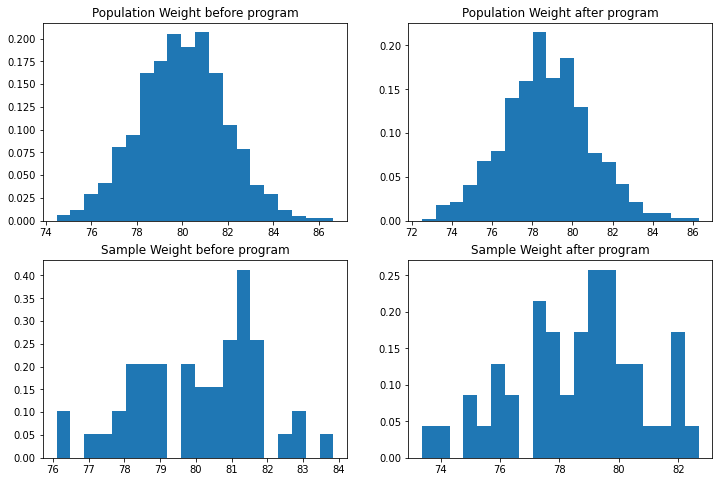

In [47]:
# define the population ground truth 
weight_before = stats.norm.rvs(loc=80, scale=2, size=1000)
weight_loss = stats.norm.rvs(loc=1.25, scale=1, size=1000)
weight_after = weight_before - weight_loss
# random sample
before_sample = np.random.choice(weight_before,size = 50)
after_sample = np.random.choice(weight_after,size = 50)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

ax[0,0].hist(weight_before, density=True, bins=20)
ax[0,0].set_title('Population Weight before program')
ax[0,1].hist(weight_after, density=True, bins=20)
ax[0,1].set_title('Population Weight after program')
ax[1,0].hist(before_sample, density=True, bins=20)
ax[1,0].set_title('Sample Weight before program')
ax[1,1].hist(after_sample, density=True, bins=20)
ax[1,1].set_title('Sample Weight after program')

- H0(Null hypothesis): The program did not work, and the mean pre-test and post-test scores are equal.
- H1(Alternative hypothesis): The mean pre-test and post-test scores are not equal.

In [48]:
t_statistic, p_value = stats.ttest_rel(before_sample, after_sample) 
print(f'The p value is {p_value:.4f}')

The p value is 0.0002


From the paried t test, we conclude that the null hypothesis is rejected and the mean weight before and after the program is different. However, we can't conclude the population has a mean weight larger or smaller than the before mean weight since what we did was a two tail test. 

To find out if the weight loss program worked in helping test subjects loss weight, it is a good idea to use The one tail paired t test.
- H0(Null hypothesis): The program did not work, and the mean pre-test and post-test scores are equal.
- H1(Alternative hypothesis): The mean pre-test is greater than the mean post-test.

In [51]:
t_statistic, p_value = stats.ttest_rel(before_sample, after_sample, alternative='greater') 
print(f'The p value is {p_value:.4f}')

The p value is 0.0001


From the one tailed paired t test, we conclude that the null hypothesis should be rejected and the mean weight before the program is greater than after the program.

# ANOVA (Analysis of Variance)
ANOVA is a test used to determine differences between research results from three or more unrelated samples or groups.
### One way ANOVA
One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group. The assumptions of the one-way ANOVA test is listed below.
1. The samples are independent.

2. Each sample is from a normally distributed population.

3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Text(0.5, 1.0, 'Sample Weight after program')

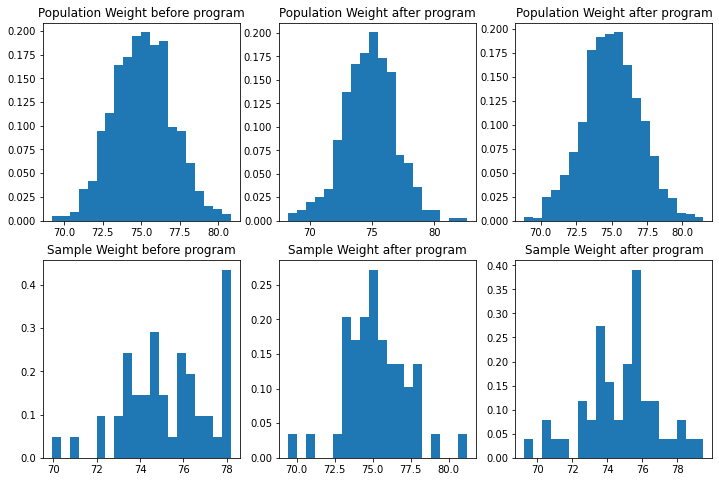

In [63]:
population_1 = stats.norm.rvs(loc=75, scale=2, size=1000)
population_2 = stats.norm.rvs(loc=75, scale=2, size=500)
population_3 = stats.norm.rvs(loc=75, scale=2, size=1200)

# random sample
sample_1 = np.random.choice(population_1,size = 50)
sample_2 = np.random.choice(population_2,size = 50)
sample_3 = np.random.choice(population_3,size = 50)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))

ax[0,0].hist(population_1, density=True, bins=20)
ax[0,0].set_title('Population Weight before program')
ax[0,1].hist(population_2, density=True, bins=20)
ax[0,1].set_title('Population Weight after program')
ax[0,2].hist(population_3, density=True, bins=20)
ax[0,2].set_title('Population Weight after program')
ax[1,0].hist(sample_1, density=True, bins=20)
ax[1,0].set_title('Sample Weight before program')
ax[1,1].hist(sample_2, density=True, bins=20)
ax[1,1].set_title('Sample Weight after program')
ax[1,2].hist(sample_3, density=True, bins=20)
ax[1,2].set_title('Sample Weight after program')

- H0(Null hypothesis): The mean accross all three population is the same.
- H1(Alternative hypothesis): At least one population mean differs from the rest.

The threshold set to 0.05.

In [64]:
t_statistic, p_value = stats.f_oneway(sample_1, sample_2, sample_3)
print(f'The p value is {p_value:.4f}')

The p value is 0.3840


From the one-way ANOVA test we conclude that we fail to reject the null hypothesis and the mean across all population is the same.

# Chi-Squared test